In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
dark_horse=cv2.imread('horse.jpg') #it is in form of BGR format
show_horse=cv2.cvtColor(dark_horse,cv2.COLOR_BGR2RGB) #show_horse is in a form of RGB format

rainbow=cv2.imread('rainbow.jpg')
show_rainbow=cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

blue_bricks=cv2.imread('bricks.jpg')
show_bricks=cv2.cvtColor(blue_bricks,cv2.COLOR_BGR2RGB)

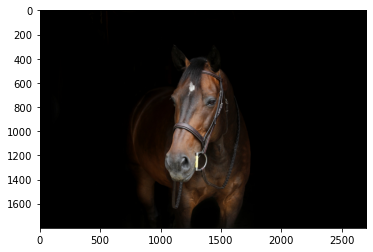

In [57]:
plt.imshow(show_horse)

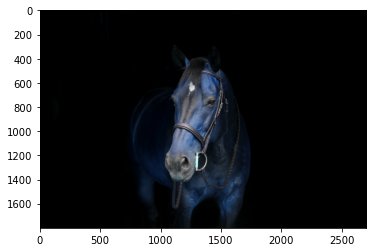

In [4]:
plt.imshow(dark_horse)

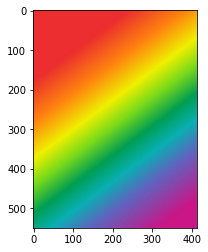

In [5]:
plt.imshow(show_rainbow)

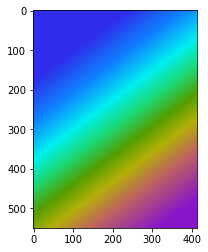

In [6]:
plt.imshow(rainbow)

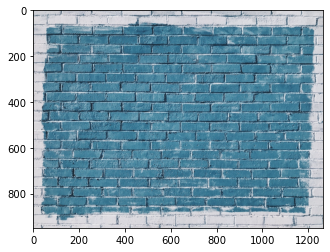

In [7]:
plt.imshow(show_bricks)

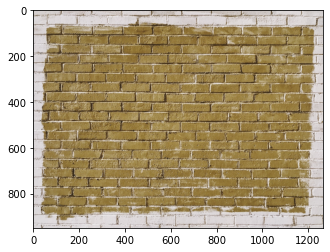

In [8]:
plt.imshow(blue_bricks)

OpenCv Histogram

cv2.calHist(images, channels, mask, histSize,ranges[,hist[,accumulate]])

images: it is a open source image of type uint8 or float32.it should be given in sqaure brackets i.e "[img]"

channels: it is also given in square brackts it is the index of channel for which we calculate the 
histogram for e if input is grayscale image, its value is [0]. For color image, you can pass[0],
[1], or [2] to calculate histogram of blue, green or red channel respectively .

mask: mask image. to find histogram of full img, it is given as "None" but if you want to find hisogram of perticular  region of img, you have to create a mask img for that and give is as mask.

histsize: this represent our BIN count. need to be given on square brackets. for full scale we pass[256].

ranges: this is our RANGE , normally it is [0,256]

In [9]:
hist_values=cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [10]:
hist_values.shape#256: hist size and 1: is one channel

(256, 1)

plot histogram

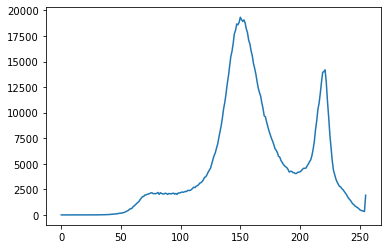

In [11]:
#let us visualize the contribition of blue channel

plt.plot(hist_values)

In [12]:
hist_values=cv2.calcHist([blue_bricks],channels=[1],mask=None,histSize=[256],ranges=[0,256])#make channel as 1

In [13]:
hist_values.shape#256: hist size and 1: is one channel

(256, 1)

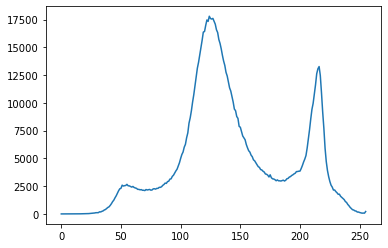

In [14]:
plt.plot(hist_values)

In [15]:
hist_values=cv2.calcHist([dark_horse],channels=[0],mask=None, histSize=[256],ranges=[0,256])

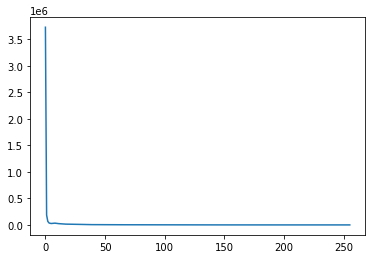

In [16]:
plt.plot(hist_values)

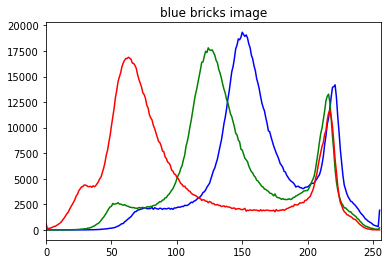

In [17]:
#contribution of each channels write in below code
img=blue_bricks
color=('b','g','r')
for i, col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.title("blue bricks image")
plt.show()

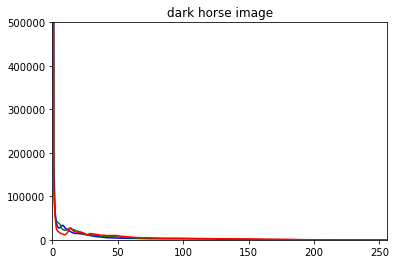

In [18]:
#contribution of each channels write in below code
img=dark_horse
color=('b','g','r')
for i, col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
    plt.ylim([0,500000])
plt.title("dark horse image")
plt.show()

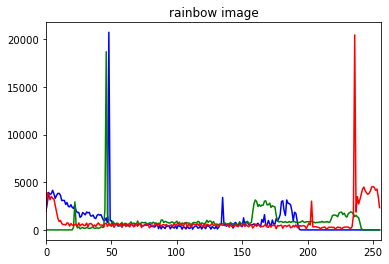

In [19]:
#contribution of each channels write in below code
img=rainbow
color=('b','g','r')
for i, col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
    #plt.ylim([0,500000])
plt.title("rainbow image")
plt.show()

in rainbow image contribution of red and green varies

Masking

we can mask only certain parts of image



# 

In [20]:
#when you are going use masking : object detection 

In [21]:
img=rainbow

In [22]:
img.shape

(550, 413, 3)

In [23]:
# create a mask
mask=np.zeros(img.shape[:2],np.uint8)
mask[300:400,100:400]=255

In [24]:
print(mask.dtype) #check mask data type
mask=mask.astype('uint8') #convert mask to uint8 if necessary

uint8


In [25]:
show_rainbow_resized=cv2.resize(show_rainbow,(mask.shape[1],mask.shape[0]))

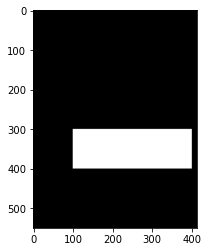

In [26]:
plt.imshow(mask,cmap='gray')

In [27]:
masked_img=cv2.bitwise_and(img,img,mask=mask)
show_masked_img=cv2.bitwise_and(show_rainbow_resized,show_rainbow_resized,mask=mask)

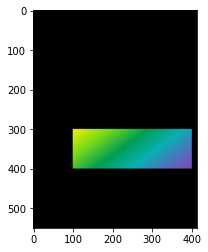

In [28]:
plt.imshow(show_masked_img)

In [29]:
print("rainbow image:",rainbow.shape)
print("mask shape",mask.shape)

rainbow image: (550, 413, 3)
mask shape (550, 413)


In [45]:
gorilla=cv2.imread("gorilla.jpg")
show_gorilla=cv2.cvtColor(gorilla,cv2.COLOR_BGR2RGB)
img=gorilla


In [46]:
img.shape

(1295, 1955, 3)

In [47]:
# create a mask
mask=np.zeros(img.shape[:2],np.uint8)
mask[300:500,850:1280]=255

In [48]:
print(mask.dtype) #check mask data type
mask=mask.astype('uint8') #convert mask to uint8 if necessary

uint8


In [49]:
show_gorilla_resized=cv2.resize(show_gorilla,(mask.shape[1],mask.shape[0]))

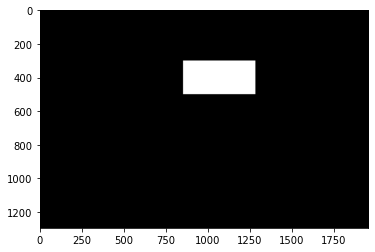

In [50]:
plt.imshow(mask,cmap='gray')

In [51]:
masked_img=cv2.bitwise_and(img,img,mask=mask)
show_masked_img=cv2.bitwise_and(show_gorilla_resized,show_gorilla_resized,mask=mask)

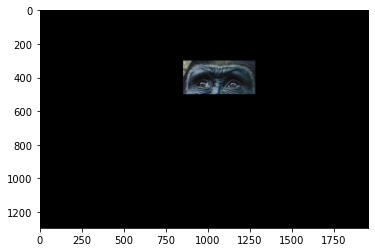

In [52]:
plt.imshow(show_masked_img)

In [53]:
# create a mask
mask=np.zeros(img.shape[:2],np.uint8)
mask[300:500,850:1280]=255

once the mask is properly fomatted you can safely computer th histogram:

In [58]:
img=rainbow

In [59]:
hist_mask_values_red=cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red=cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:173: error: (-215:Assertion failed) mask.size() == imsize && mask.channels() == 1 in function 'cv::histPrepareImages'


In [60]:
hist_mask_values=cv2.calcHist([rainbow],channels=[2],mask=mask, histSize=[256],ranges=[0,256])

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:173: error: (-215:Assertion failed) mask.size() == imsize && mask.channels() == 1 in function 'cv::histPrepareImages'


In [61]:
plt.plot(hist_full_values_red)
plt.title("histogram for red values of the full ranges")

NameError: name 'hist_full_values_red' is not defined

Equalization

In [63]:
gorilla=cv2.imread('gorilla.jpg',0)

'''here is brief overview of the different options for this argument:

0: read the image in grayscale  mode.
1: read the image in color mode(default) ,resulting in a 3-channel image
-1: read the image with the alpha channel, if it exists,
resulting in a 4-channel image.

In your case using 0 will load gorilla.jpg as a grayscale image.'''


'here is brief overview of the different options for this argument:\n\n0: read the image in grayscale  mode.\n1: read the image in color mode(default) ,resulting in a 3-channel image\n-1: read the image with the alpha channel, if it exists,\nresulting in a 4-channel image.\n\nIn your case using 0 will load gorilla.jpg as a grayscale image.'

In [69]:
def display(img,cmap=None):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap)

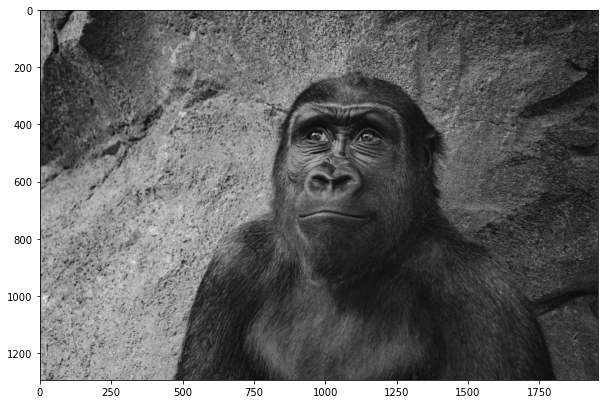

In [70]:
display(gorilla,cmap='gray')

In [71]:
hist_values=cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

'''[gorilla]:

this is the image (or list of images) for which yo want to calculate 
channels=[0]:

   This  specifies the index of the channel you want to compute
   the histogram for. since the image is grayscale, it has only one chnannel,
   which is indexed as 0.
   for color images you could specify [0] for the blue channel ,[1] for the green channel ,and [2]
   for the red channel
   
   
mask=None:

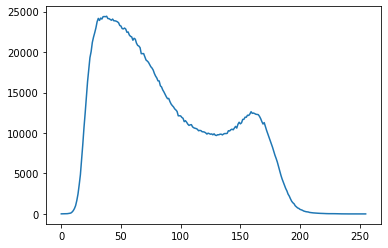

In [72]:
plt.plot(hist_values)

In [74]:
#apply equalization

eq_gorilla=cv2.equalizeHist(gorilla)


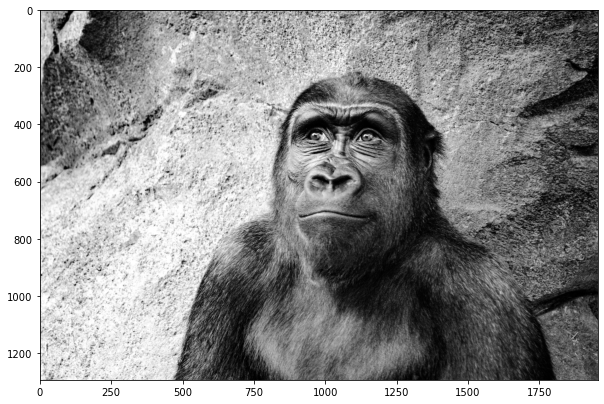

In [75]:
display(eq_gorilla,cmap='gray')

In [76]:
hist_values=cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

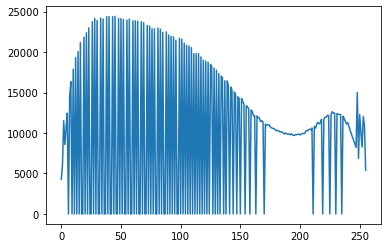

In [77]:
plt.plot(hist_values)

In [78]:
color_gorilla=cv2.imread('gorilla.jpg')
show_gorilla=cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
#convert to HSV colorspace
hsv=cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

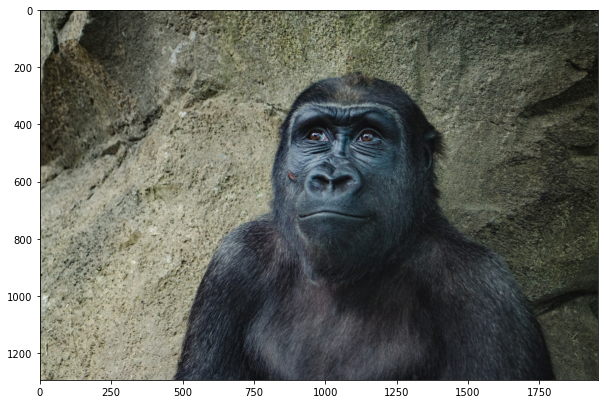

In [79]:
display(show_gorilla)

In [80]:
#grab v channel:

hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

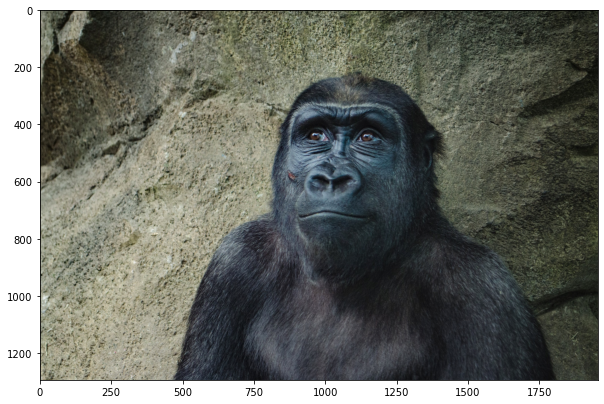

In [81]:
#convert black to RGB to visualize
eq_color_gorilla=cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)

In [82]:
hist_values=cv2.calcHist([eq_color_gorilla],channels=[1],mask=None,histSize=[256],ranges=[0,256])

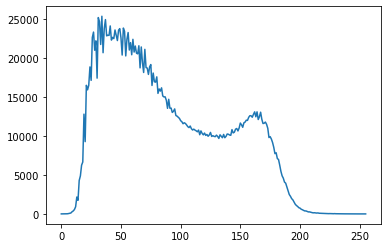

In [83]:
plt.plot(hist_values)